### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.
    check the file "unique_values_bf_data_clean.csv" in the results folder to look at the unique values before data cleaning. We can see there are columns that have nan values and those columns are listed below for data clean up along with their resolution
    Findings: Number of "nan" in columns
        Car                     12576
        Bar                       107
        CoffeeHouse               217
        CarryAway                 151
        RestaurantLessThan20      130
        Restaurant20To50          189



In [11]:
data.apply(lambda col: col.unique())

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

In [93]:
tmp_dataset = data.copy(deep=True)

In [78]:
nan_list = [tmp_dataset['car'].isnull().sum(),tmp_dataset['Bar'].isnull().sum(), tmp_dataset['CoffeeHouse'].isnull().sum(),tmp_dataset['CarryAway'].isnull().sum(),tmp_dataset['RestaurantLessThan20'].isnull().sum(),tmp_dataset['Restaurant20To50'].isnull().sum()]
nan_list_series = pd.Series(nan_list, index = ["Car","Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"])
print(nan_list_series)

Car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

        -- Car : Significant number of records with "nan"s and coupon accepted (7148). we cannot drop these rows. so lets replace the nan with "Unknown Transportation"
        -- Bar : had 107 nan. Resolution: check if these persons have any kids with them. if so replace 'nan' with 'never' as a fair assumption. if not then replace 'nan' with mean of means of other values
        -- CoffeHouse
        -- CarryAway
        -- RestaurantLessThan20
        -- Restaurant20To50

In [212]:
# lets find if the rows with car = nan has used any of the coupons
# tmp_dataset.query( 'Y ==1 &  car.isnull()', engine='python')

In [94]:
tmp_dataset['car'] = tmp_dataset['car'].fillna("Unknown Transportation")

In [95]:
# lets work on the Bar nans.
# tmp_dataset.query( 'Bar.isnull() & has_children > 0', engine='python')
tmp_dataset.loc[(tmp_dataset['Bar'].isnull() & tmp_dataset['has_children'] > 0),'Bar'] ='never'

In [211]:
# tmp_dataset.query( 'has_children == 0 & Bar == "never"', engine='python')
# tmp_dataset.query( 'Bar.isnull() & has_children == 0', engine='python')

<Axes: xlabel='Bar', ylabel='Count'>

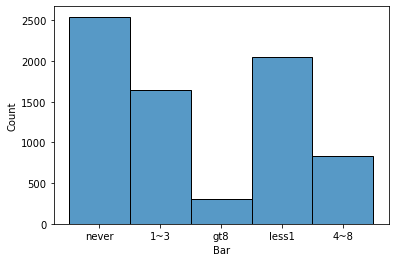

In [100]:
sns.histplot(data=tmp_dataset[tmp_dataset['has_children'] == 0], x="Bar")

In [213]:
#tmp_dataset.loc[(tmp_dataset['Bar'].isnull() & tmp_dataset['has_children'] == 0),'Bar']
# tmp_dataset[tmp_dataset['Bar'].isnull()]

In [104]:
tmp_dataset['Bar'] = tmp_dataset['Bar'].fillna("1~3")

<Axes: xlabel='Bar', ylabel='Count'>

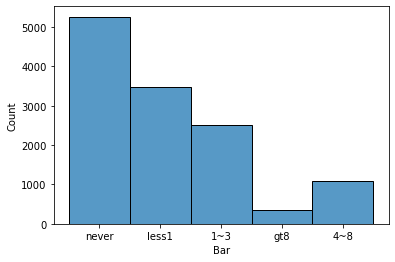

In [105]:
sns.histplot(data=tmp_dataset, x="Bar")

In [106]:
tmp_dataset['Bar'].isnull().sum()

0

<Axes: xlabel='CoffeeHouse', ylabel='Count'>

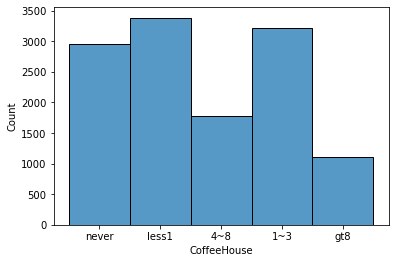

In [110]:
sns.histplot(data=tmp_dataset, x="CoffeeHouse")
# tmp_dataset['CoffeeHouse'].value_counts()

In [111]:
tmp_dataset['CoffeeHouse'] = tmp_dataset['CoffeeHouse'].fillna("4~8")

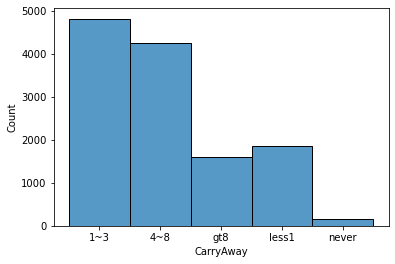

In [115]:
tmp_dataset['CarryAway'].isnull().sum()
sns.histplot(data=tmp_dataset, x="CarryAway")
tmp_dataset['CarryAway'] = tmp_dataset['CarryAway'].fillna("1~3")

In [121]:
tmp_dataset['RestaurantLessThan20'] = tmp_dataset['RestaurantLessThan20'].fillna("Unknown")
tmp_dataset['Restaurant20To50'] = tmp_dataset['Restaurant20To50'].fillna("Unknown")

In [120]:
nan_list = [tmp_dataset['car'].isnull().sum(),tmp_dataset['Bar'].isnull().sum(), tmp_dataset['CoffeeHouse'].isnull().sum(),tmp_dataset['CarryAway'].isnull().sum(),tmp_dataset['RestaurantLessThan20'].isnull().sum(),tmp_dataset['Restaurant20To50'].isnull().sum()]
nan_list_series = pd.Series(nan_list, index = ["Car","Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"])
print(nan_list_series)

Car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [154]:
coupon_temp_set = tmp_dataset[['coupon','Y']]
coupon_temp_set.value_counts()

coupon                 Y
Coffee House           0    2001
                       1    1995
Restaurant(<20)        1    1970
Carry out & Take away  1    1760
Bar                    0    1190
Restaurant(20-50)      0     834
Bar                    1     827
Restaurant(<20)        0     816
Restaurant(20-50)      1     658
Carry out & Take away  0     633
dtype: int64

In [204]:
# lets do the normalize and call it under normalized_counts column
coupon_df = pd.DataFrame(coupon_temp_set.value_counts().reset_index().values,columns=['coupon','accepted','counts'])
coupon_df['normalized_counts'] = (coupon_df['counts'] / coupon_df['counts'].sum())
coupon_df.head(100)

,coupon,accepted,counts,normalized_counts
0,Coffee House,0,2001,0.157758
1,Coffee House,1,1995,0.157285
2,Restaurant(<20),1,1970,0.155314
3,Carry out & Take away,1,1760,0.138757
4,Bar,0,1190,0.093819
5,Restaurant(20-50),0,834,0.065752
6,Bar,1,827,0.0652
7,Restaurant(<20),0,816,0.064333
8,Restaurant(20-50),1,658,0.051876
9,Carry out & Take away,0,633,0.049905


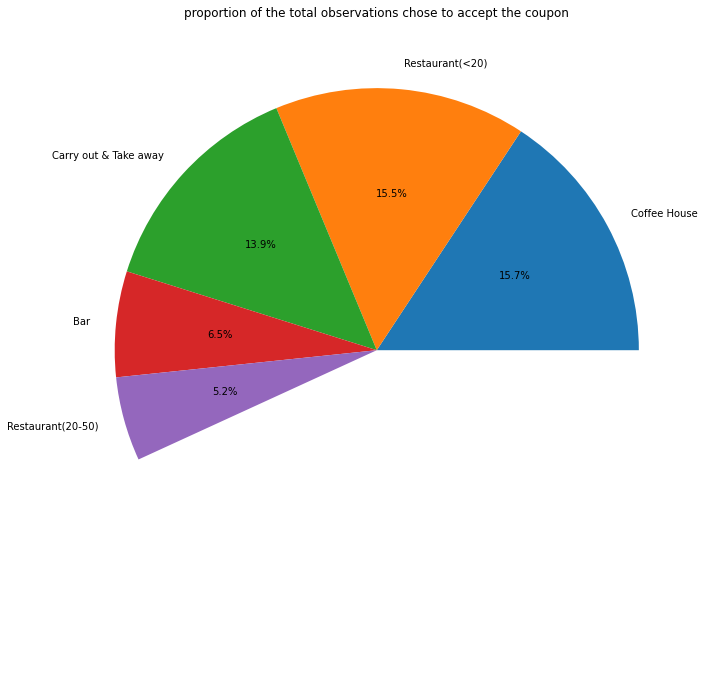

In [210]:
fig, ax = plt.subplots(figsize=(10, 10))
accepted = coupon_df[coupon_df['accepted']==1]
x = accepted['normalized_counts']
labels = accepted['coupon']
ax.pie(x, labels=labels,normalize=False, autopct='%.1f%%')
ax.set_title('proportion of the total observations chose to accept the coupon')
plt.tight_layout()

5. Use a bar plot to visualize the `coupon` column.

<Axes: >

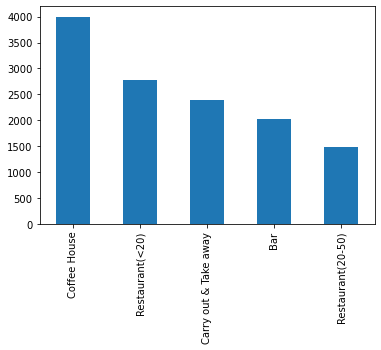

In [133]:
# print(tmp_dataset['coupon'])
tmp_dataset['coupon'].value_counts().plot(kind="bar")

<Axes: xlabel='coupon', ylabel='count'>

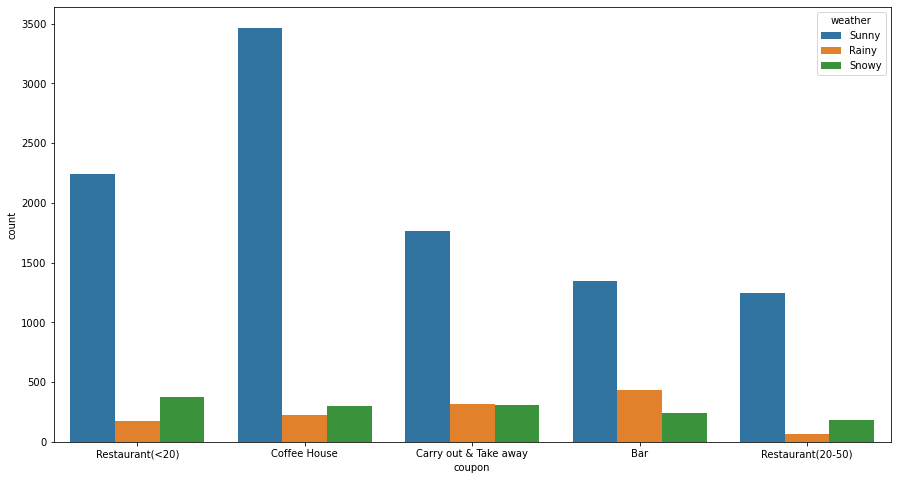

In [141]:
plt.figure(figsize=(15,8))
sns.countplot(x='coupon', data=tmp_dataset, hue='weather')

6. Use a histogram to visualize the temperature column.

In [215]:
tmp_dataset.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


<Axes: xlabel='temperature', ylabel='Count'>

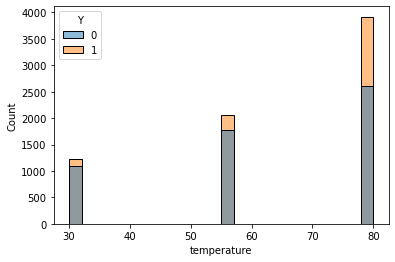

In [220]:
temperature_set = tmp_dataset[['temperature','Y']]
sns.histplot(x = "temperature", hue = "Y", data = temperature_set)

In [231]:
fig = px.histogram(temperature_set, x="temperature", color='Y',nbins=80)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [247]:
bar_set = tmp_dataset[tmp_dataset['coupon']=='Bar']
bar_set.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?
    Proportion of bar coupons that were accepted : 41.0%


In [243]:
bar_set_mini = pd.DataFrame(bar_set[['coupon','Y']].value_counts().reset_index().values,columns=['coupon','accepted','counts'])
bar_set_mini['acceptance_ratio'] = (bar_set_mini['counts'] / bar_set_mini['counts'].sum())
bar_set_mini.head()

,coupon,accepted,counts,acceptance_ratio
0,Bar,0,1190,0.589985
1,Bar,1,827,0.410015


<Axes: ylabel='acceptance_ratio'>

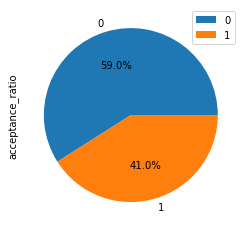

In [244]:
bar_set_mini.plot(kind='pie',y='acceptance_ratio', autopct='%.1f%%')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [305]:
set_3_1 = tmp_dataset[tmp_dataset['Bar'].isin(['never', 'less1', '1~3'])][['Bar','Y']]
set_3_2 = tmp_dataset[tmp_dataset['Bar'].isin(['gt8', '4~8'])][['Bar','Y']]
set_3_1_df = pd.DataFrame(set_3_1.value_counts().reset_index().values,columns=['Bar','accepted','counts'])
set_3_2_df = pd.DataFrame(set_3_2.value_counts().reset_index().values,columns=['Bar','accepted','counts'])
set_3_1_df['acceptance_rate'] = (set_3_1_df['counts'] / set_3_1_df['counts'].sum())
set_3_2_df['acceptance_rate'] = (set_3_2_df['counts'] / set_3_2_df['counts'].sum())

In [306]:
set_3_1_df

,Bar,accepted,counts,acceptance_rate
0,never,1,2804,0.249045
1,never,0,2455,0.218048
2,less1,1,1963,0.174349
3,1~3,1,1556,0.138201
4,less1,0,1519,0.134914
5,1~3,0,962,0.085443


acceptance rate for those who went to Bar fewer than 3 times in a month --> 56.16
acceptance rate for those who went to Bar more than 3 times in a month --> 62.25


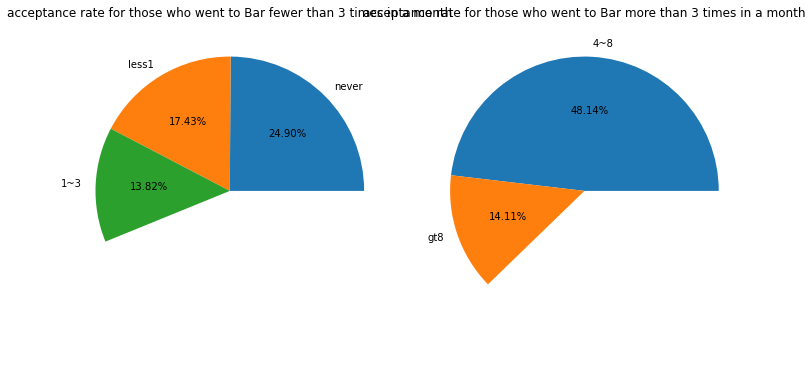

In [321]:
print('acceptance rate for those who went to Bar fewer than 3 times in a month -->', round(set_3_1_df[set_3_1_df['accepted']==1]['acceptance_rate'].sum()*100,2))
print('acceptance rate for those who went to Bar more than 3 times in a month -->',round(set_3_2_df[set_3_2_df['accepted']==1]['acceptance_rate'].sum()*100,2))
plt.figure(figsize = (10, 10))
plt.subplot(221)
accepted = set_3_1_df[set_3_1_df['accepted']==1]
plt.pie(accepted['acceptance_rate'], labels=accepted['Bar'],normalize=False, autopct='%.2f%%')
plt.title('acceptance rate for those who went to Bar fewer than 3 times in a month')
plt.tight_layout()

plt.subplot(222)
accepted = set_3_2_df[set_3_2_df['accepted']==1]
plt.pie(accepted['acceptance_rate'], labels=accepted['Bar'],normalize=False, autopct='%.2f%%')
plt.title('acceptance rate for those who went to Bar more than 3 times in a month')
plt.tight_layout()

In [298]:
set_3_2_df

,Bar,accepted,counts,acceptance_rate
0,4~8,1,686,0.481404
1,4~8,0,390,0.273684
2,gt8,1,201,0.141053
3,gt8,0,148,0.10386


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  